## In Vitro Validation with NanoBert

### Load data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data_ck2 = pd.read_excel('data/nano_bert_lineplot_ck2.xlsx')
data_braf = pd.read_excel('data/nano_bert_lineplot_braf_1.xlsx')

### Define function

In [21]:
def sigmoidal_curve(x, a, b, c):
    y = c / (1 + np.exp(-a*(x-b)))
    return y

### CK2 plot

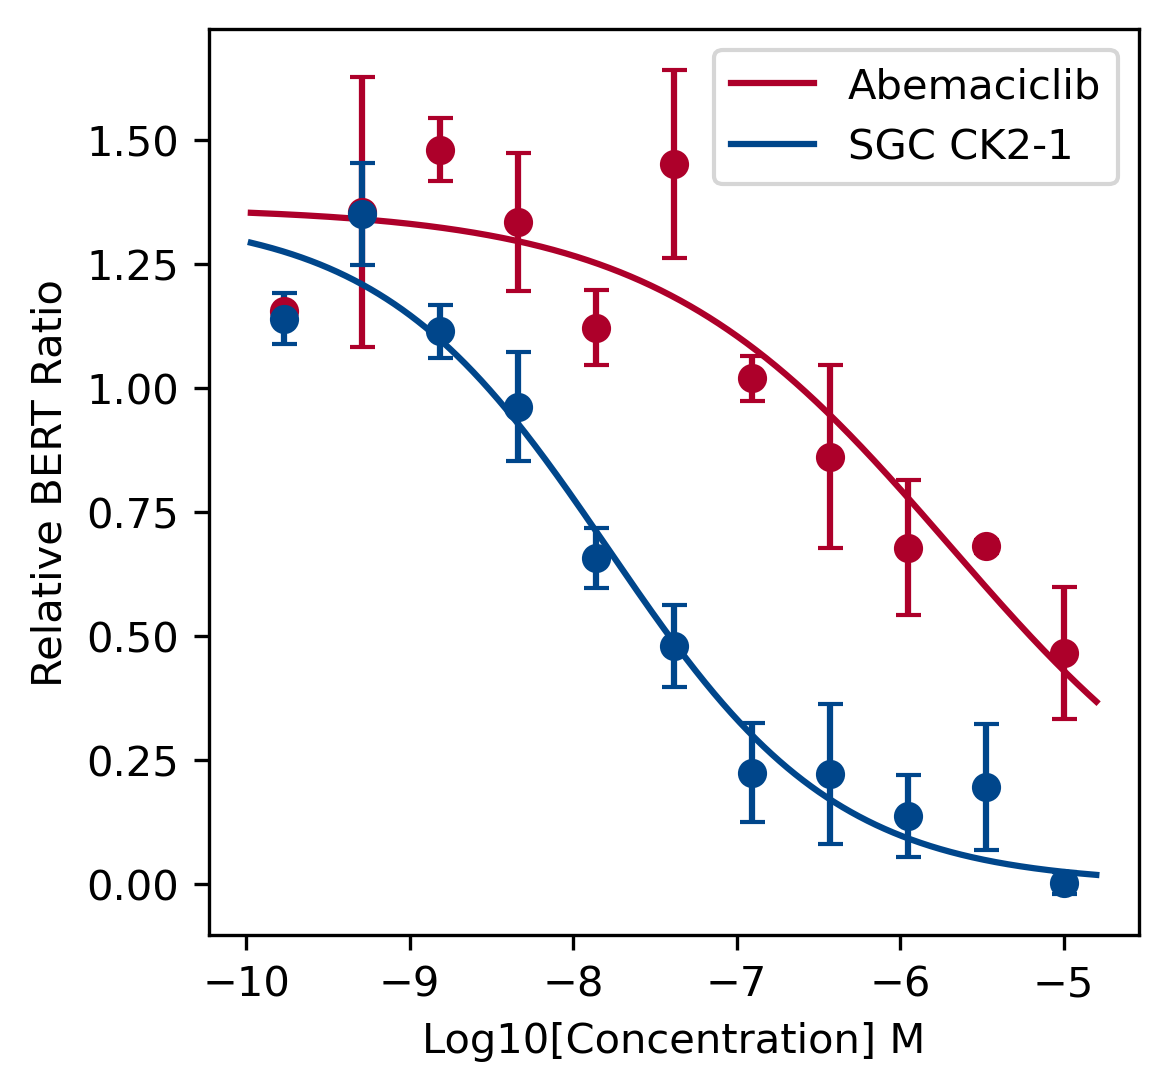

Abemaciclib IC50 = 2010.68 nM
SGC CK2-1 IC50 = 16.44 nM


In [22]:
import numpy as np
from scipy.optimize import curve_fit

x_values = data_ck2.loc[:,'x'].values
y1_values = data_ck2.loc[:,'y_abemaciclib'].values
y1_error = data_ck2.loc[:,'sd_abemaciclib'].values
y2_values = data_ck2.loc[:,'y_sgc_ck2'].values
y2_error = data_ck2.loc[:,'sd_sgc_ck2'].values

x0 = np.arange(x_values[-1] - 0.2, x_values[0] + 0.2, 0.001)
popt1, pcov1 = curve_fit(sigmoidal_curve, list(x_values) , list(y1_values), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x_values), list(y2_values), maxfev=10000)

plt.figure(figsize=(4, 4), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Abemaciclib', color='#AD002AFF')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='SGC CK2-1', color='#00468BFF')
plt.errorbar(x_values, y1_values, yerr=y1_error, fmt='o', capsize=3, color='#AD002AFF')
plt.errorbar(x_values, y2_values, yerr=y2_error, fmt='o', capsize=3, color='#00468BFF')
plt.legend()
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative BERT Ratio")
plt.show()

# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9

# Print the IC50 value
print("Abemaciclib IC50 = {:.2f} nM".format(ic50_1))
print("SGC CK2-1 IC50 = {:.2f} nM".format(ic50_2))

### BRAF plot

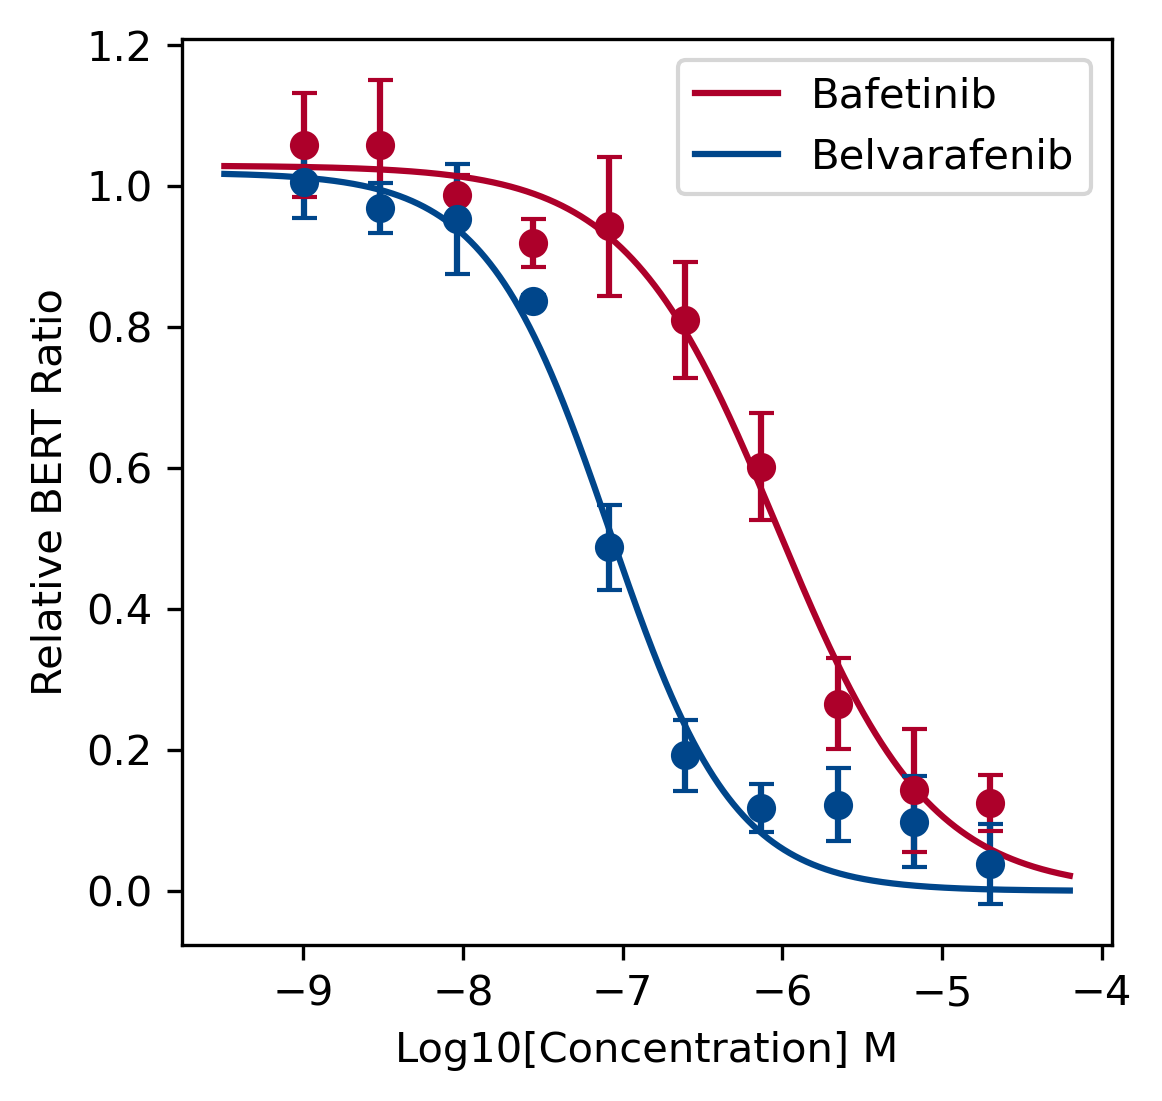

Bafetinib IC50 = 937.77 nM
Belvarafenib IC50 = 83.51 nM


In [23]:
import numpy as np
from scipy.optimize import curve_fit

x_values = data_braf.loc[:,'x'].values
y1_values = data_braf.loc[:,'y_bafetinib'].values
y1_error = data_braf.loc[:,'sd_bafetinib'].values
y2_values = data_braf.loc[:,'y_belvarafenib'].values
y2_error = data_braf.loc[:,'sd_belvarafenib'].values

x0 = np.arange(x_values[0] - 0.5, x_values[-1] + 0.5, 0.001)
popt1, pcov1 = curve_fit(sigmoidal_curve, list(x_values) , list(y1_values), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x_values), list(y2_values), maxfev=10000)

plt.figure(figsize=(4, 4), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Bafetinib', color='#AD002AFF')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='Belvarafenib', color='#00468BFF')
plt.errorbar(x_values, y1_values, yerr=y1_error, fmt='o', capsize=3, color='#AD002AFF')
plt.errorbar(x_values, y2_values, yerr=y2_error, fmt='o', capsize=3, color='#00468BFF')
plt.legend()
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative BERT Ratio")
plt.show()

# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9

# Print the IC50 value
print("Bafetinib IC50 = {:.2f} nM".format(ic50_1))
print("Belvarafenib IC50 = {:.2f} nM".format(ic50_2))